##**COVID19 AND PNEUMONIA Classification using VGG-16 Model**
This tutorial includes the implementaion of the deep learning model, VGG-16 for multi-class classification on Chest X-ray (Covid-19 & Pneumonia) dataset. The following are the steps involved in this process.


1. Importing library
2. Data preparation
3. Visualization of Data
4. Create the model
5. Data Augmantaion
6. Training and Compailing the model
7. Evaluation of model


## Importing library

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, InceptionResNetV2
from keras.layers import Flatten , Dense, Dropout , MaxPool2D, Conv2D
from keras.models import Model
import matplotlib.pyplot as plt
import keras
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

## Data preparation

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
IMAGE_SIZE = [224, 224]

data_path = "/content/gdrive/MyDrive/Data"
train_path = data_path +"/train"
test_path = data_path + "/test"
os.listdir(train_path)

['COVID19', 'PNEUMONIA', 'NORMAL']

##Data Augmantaion

In [4]:

train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    
                                    )

train = train_data_gen.flow_from_directory(directory= train_path, 
                                           target_size=(224,224))

Found 5144 images belonging to 3 classes.


In [5]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path , 
                                          target_size=(224,224), 
                                          shuffle= False)

Found 1288 images belonging to 3 classes.


In [6]:
# Covid +ve X-Ray is represented by 0 and Normal is represented by 1 and Pneumonia is represented as 2
class_type = {0:'COVID19',  1 : 'NORMAL', 2 : 'PNEUMONIA'}

## Visualization of Data

In [7]:
# to visualize the images in the traing data denerator 

t_img , label = train.next()

In [8]:
# function when called will prot the images 

def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

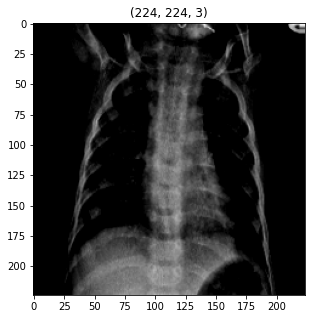

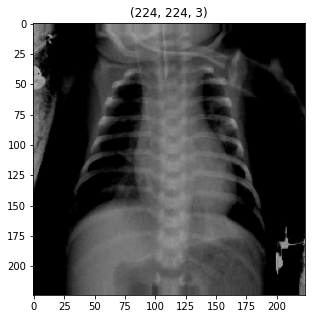

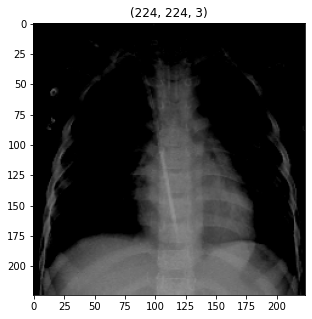

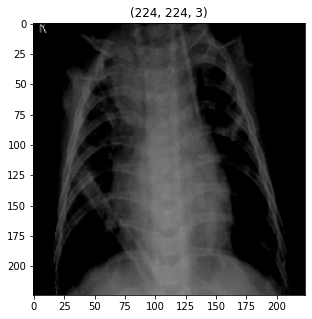

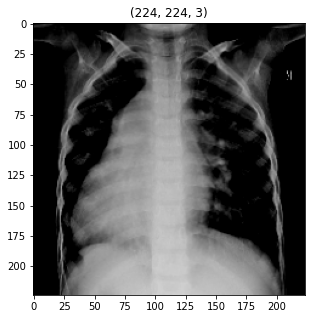

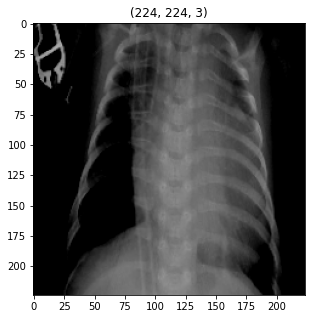

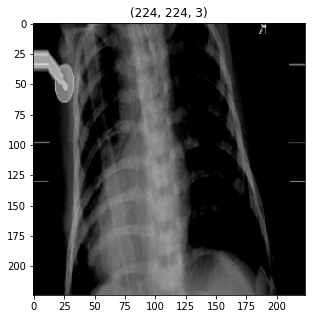

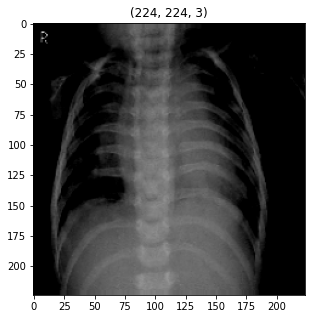

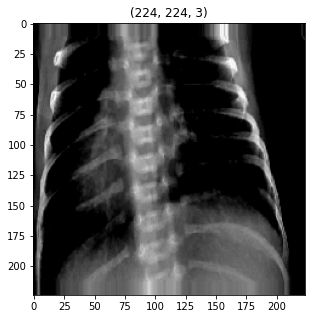

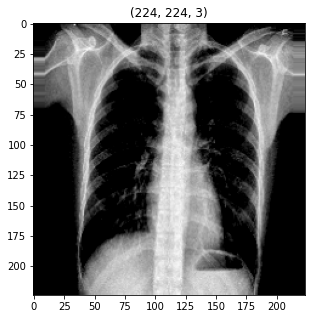

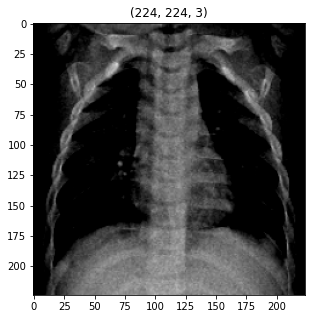

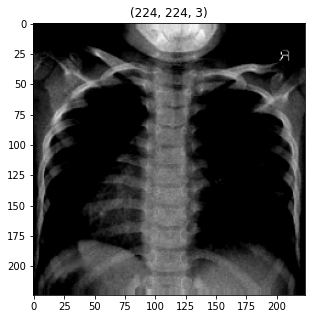

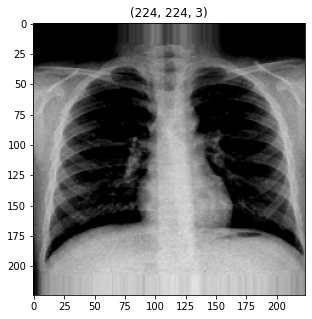

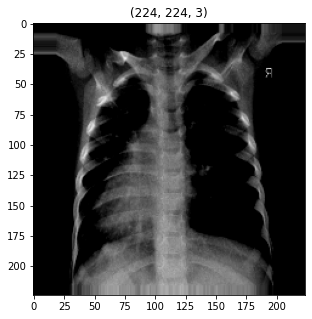

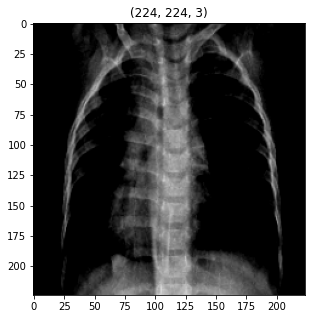

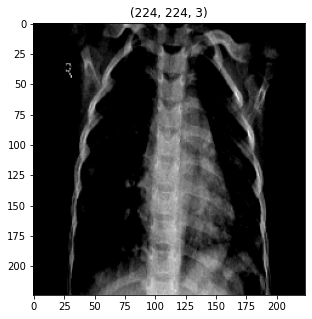

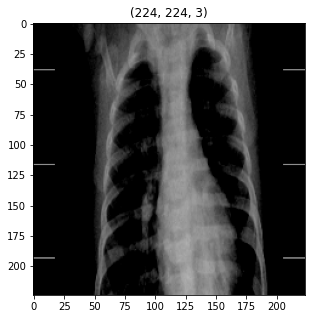

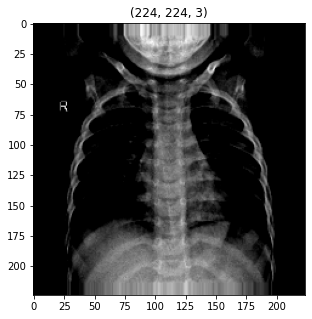

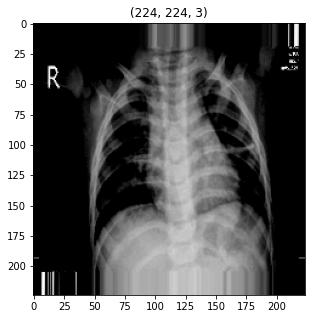

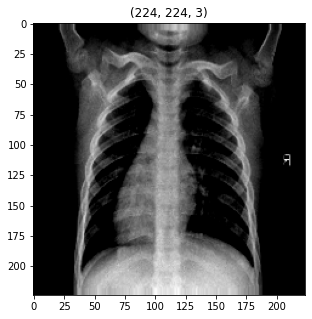

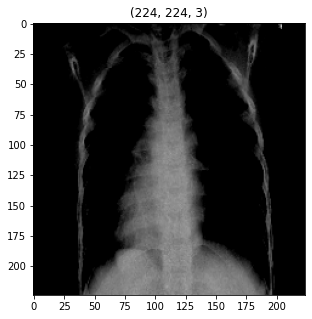

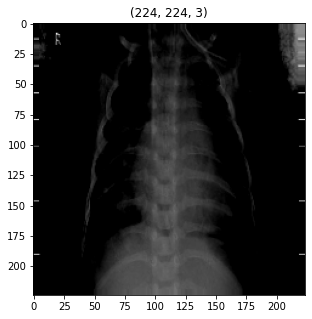

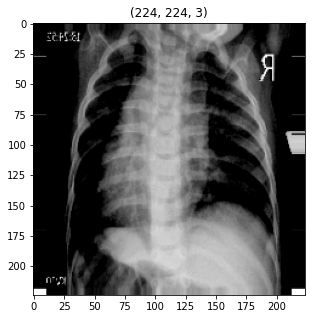

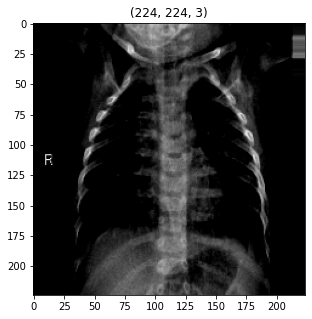

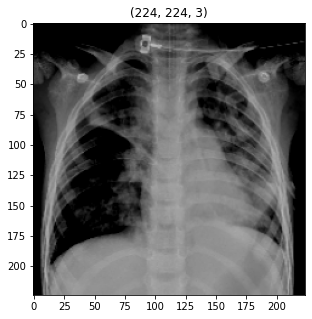

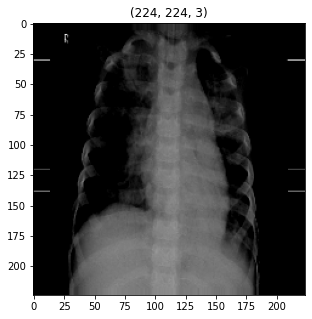

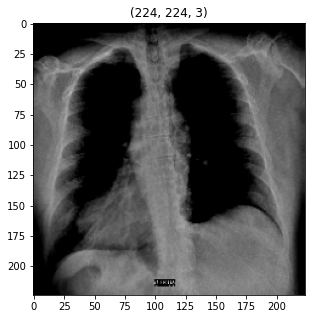

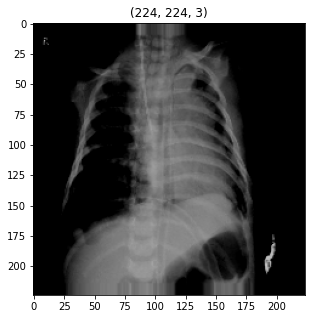

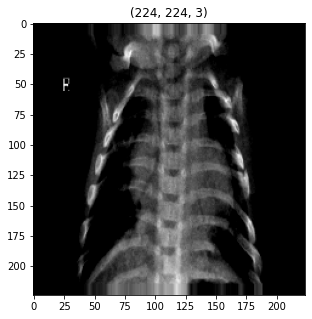

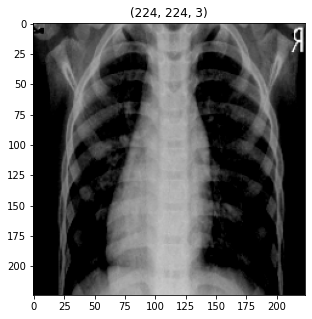

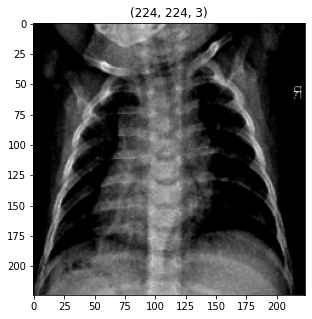

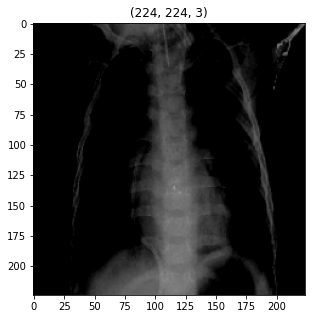

In [9]:
# function call to plot the images 

plotImages(t_img, label)

##**Create the model**

###InceptionResNetV2 is a deep neural network architecture that combines the Inception and ResNet modules for high accuracy in image classification tasks. It has a total of 164 layers and uses techniques like batch normalization, residual connections, and stem convolution to improve training efficiency and performance.

In [10]:
res = InceptionResNetV2( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

219055592/219055592 [==============================] - 1s 0us/step


In [11]:
for layer in res.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [12]:
x = Flatten()(res.output)
x = Dense(units=3 , activation='sigmoid', name = 'predictions' )(x)

In [13]:
model = Model(res.input, x)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

##**Training and compiling the model**
Compiling the model involves defining the loss function, optimizer, and evaluation metric, while training uses the fit_generator method to train the model on the augmented image data. During training, the model generates predictions on the training set and updates its weights to minimize the loss function, while monitoring the model's performance on the validation set. The trained model can be saved and used to generate predictions on new data.

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
hist = model.fit_generator(train, steps_per_epoch= 20, epochs= 10, validation_data= test, validation_steps= 16)

<ipython-input-17-ec886ba9bb52>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, steps_per_epoch= 20, epochs= 10, validation_data= test, validation_steps= 16)


Epoch 1/10
20/20 [==============================] - 170s 9s/step - loss: 0.6555 - accuracy: 0.9225 - val_loss: 1.4599 - val_accuracy: 0.8086
Epoch 2/10
20/20 [==============================] - 127s 6s/step - loss: 0.7726 - accuracy: 0.9114 - val_loss: 1.7948 - val_accuracy: 0.8105
Epoch 3/10
20/20 [==============================] - 147s 7s/step - loss: 0.6652 - accuracy: 0.9047 - val_loss: 0.5862 - val_accuracy: 0.9004
Epoch 4/10
20/20 [==============================] - 137s 7s/step - loss: 0.4495 - accuracy: 0.9272 - val_loss: 1.1727 - val_accuracy: 0.8535
Epoch 5/10
20/20 [==============================] - 105s 5s/step - loss: 0.5332 - accuracy: 0.9281 - val_loss: 1.0037 - val_accuracy: 0.8672
Epoch 6/10
20/20 [==============================] - 116s 6s/step - loss: 0.4953 - accuracy: 0.9156 - val_loss: 0.7020 - val_accuracy: 0.8906
Epoch 7/10
20/20 [==============================] - 103s 5s/step - loss: 0.5881 - accuracy: 0.9187 - val_loss: 0.5048 - val_accuracy: 0.9062
Epoch 8/10
20

In [18]:
predict = np.argmax(model.predict(test), axis=1)
predict

41/41 [==============================] - 291s 7s/step


array([0, 0, 0, ..., 2, 2, 2])

##**Evaluation of model**

In [19]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

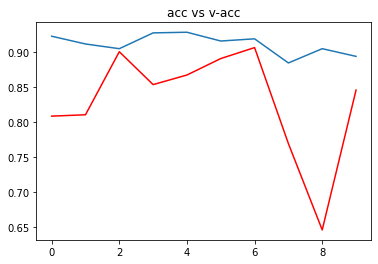

In [20]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

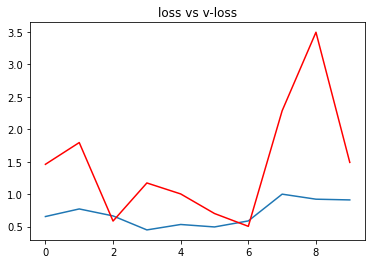

In [21]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [32]:
# Evaluating the model
_, acc = model.evaluate(test, verbose = 1)
print('%.3f' % (acc * 100.0))

41/41 [==============================] - 46s 1s/step - loss: 0.6208 - accuracy: 0.9309
93.090
